In [5]:
import numpy as np
import matplotlib.pylab as plt
from os.path import join
from ipywidgets import widgets, interact
from IPython.display import display, clear_output
from scipy.signal import argrelextrema

In [2]:
names=['EB', 'RR', 'RRless', 'MM']
spectra_ls = list()
spectra_nmf = list()
freq = list()
data_lc = list()
for i in range(len(names)):
    data_lc.append(np.loadtxt(join('data', names[i]+'.dat')))
    H = np.loadtxt(join('data', 'H_'+names[i]+'.txt'))
    freq.append(H[0])
    spectra_nmf.append(H[-1])
    spectra_ls.append(np.loadtxt(join('data', 'LS_'+names[i]+'.txt')))

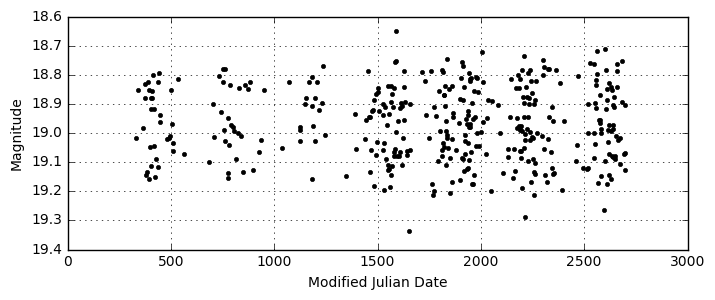

In [6]:
lc_idx = 1 # valores entre 0-3

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1, 1, 1)
l2, = ax.plot(data_lc[lc_idx][:,0], data_lc[lc_idx][:,1], 'k.')
ax.invert_yaxis()
plt.grid()
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
display(fig)

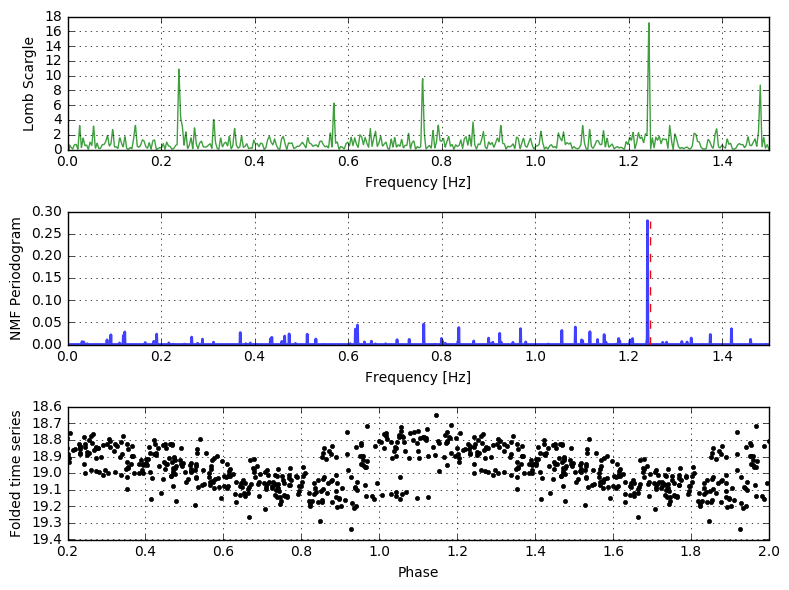

In [7]:
f = freq[lc_idx]
f_fold = 0.5
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(3, 1, 1)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Lomb Scargle')
ax.set_xlim([np.min(f), np.max(f)])
plt.grid()
l1, = ax.plot(f, spectra_ls[lc_idx], 'g-', linewidth=1, alpha=0.75)
ax1 = fig.add_subplot(3, 1, 2)
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('NMF Periodogram')
#l1, = ax1.plot(f, normalize_spectrum(spectra_ls[lc_idx]), linewidth=1, alpha=0.75)
#l2, = ax1.plot(f, (np.abs(CSD)-np.min(CSD))/(np.max(CSD)-np.min(CSD)), linewidth=1, alpha=0.75)
l3, = ax1.plot(f, spectra_nmf[lc_idx], linewidth=2, alpha=0.75)
l4, = ax1.plot([f_fold, f_fold], [0.0, np.amax( spectra_nmf[lc_idx])], 'r--', linewidth=1)
ax1.set_xlim([np.min(f), np.max(f)])
#plt.legend(["PSD", "CSD", "CKP"], prop={'size': 10})
#plt.legend(["PSD", "NMF"], prop={'size': 10})
plt.grid()
ax2 = fig.add_subplot(3, 1, 3)
#folded time series
ax2.set_xlabel('Phase')
ax2.set_ylabel('Folded time series')
plt.grid()
phase = np.mod(data_lc[lc_idx][:,0], 1.0/f_fold)*f_fold
l5, = ax2.plot(np.concatenate((phase, phase+1.0)), np.concatenate((data_lc[lc_idx][:, 1], data_lc[lc_idx][:, 1])),'k.')
ax2.invert_yaxis()
NMF_extrema = argrelextrema(spectra_nmf[lc_idx], np.greater)[0]
#NMF_extrema = NMF_extrema[spectra_nmf[lc_idx][NMF_extrema] > np.mean(spectra_nmf[lc_idx]) ]
plt.tight_layout()

slider2 = widgets.FloatSlider(value=0.5, min=np.amin(f), max=np.amax(f), step=(np.amax(f)-np.amin(f))/100, 
                             continuous_update=True, description="Fold frequency", readout_format='0.3f')
slider2.layout.width = '70%'


def update_f(change):
    val = (change['new'])
    l4.set_xdata([val, val])    
    if np.amin(np.absolute(f[NMF_extrema] - val)) < 2*(np.amax(f)-np.amin(f))/100:
        idx = np.argmin(np.absolute(f[NMF_extrema] - val))
        val = f[NMF_extrema[idx]]
        #ax1.set_title(str(f[NMF_extrema[idx]])) 
    if lc_idx == 2:
        if np.abs(val - 1.24036) < 0.01:
            val = 1.2403
    phase = np.mod(data_lc[lc_idx][:,0], 1.0/val)*val
    l5.set_xdata(np.concatenate((phase, phase+1.0))) 
    plt.close()
    clear_output(wait=True)
    display(fig)

slider2.observe(update_f, names='value')
display(slider2)
display(fig)
